In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Loading the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


## Question 1

In [15]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['weekday'] = df['hour_beginning'].dt.weekday

In [16]:
# Filtering the data to include only weekdays (Monday to Friday, 0-4)
weekday_data = df[df['weekday'] < 5]

In [45]:
# Grouping by weekday and sum the pedestrian counts for each weekday
weekday_pedestrian_counts = weekday_data.groupby('weekday')['Pedestrians'].sum().reset_index()

In [44]:
# Mapping weekday numbers to their names
weekday_pedestrian_counts['weekday'] = weekday_pedestrian_counts['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'
})

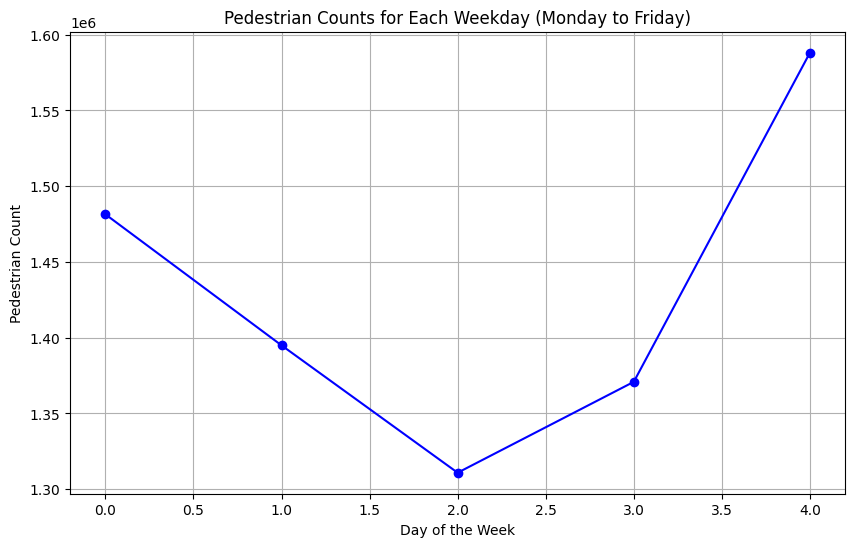

In [46]:
# Plotting the line graph for pedestrian counts on weekdays
plt.figure(figsize=(10, 6))
plt.plot(weekday_pedestrian_counts['weekday'], weekday_pedestrian_counts['Pedestrians'],
         marker='o', linestyle='-', color='b')
plt.title('Pedestrian Counts for Each Weekday (Monday to Friday)')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.show()

## Question 2

In [20]:
# Converting 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


In [22]:
# Filtering the data for the year 2019
df_2019 = df[df['hour_beginning'].dt.year == 2019]
df_2019.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,weekday
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0


In [47]:
# Checking for missing values in weather_summary and Pedestrians
df_2019[['weather_summary', 'Pedestrians']].isnull().sum()

,0
weather_summary,14
Pedestrians,0


In [48]:
# Dropping the rows where weather_summary or Pedestrians are missing
df_2019_clean = df_2019.dropna(subset=['weather_summary', 'Pedestrians'])

In [49]:
# Applying one-hot encoding to categorical columns
categorical_cols = ['weather_summary', 'location']
df_encoded = pd.get_dummies(df_2019_clean, columns=categorical_cols)
df_encoded.head()

,hour_beginning,Pedestrians,Towards Manhattan,Towards Brooklyn,temperature,precipitation,lat,long,events,Location1,...,weather_summary_clear-night,weather_summary_cloudy,weather_summary_fog,weather_summary_partly-cloudy-day,weather_summary_partly-cloudy-night,weather_summary_rain,weather_summary_sleet,weather_summary_snow,weather_summary_wind,location_Brooklyn Bridge
1,2019-12-31 22:00:00,10,9,1,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",...,False,True,False,False,False,False,False,False,False,True
2,2019-12-31 23:00:00,2,0,2,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",...,False,True,False,False,False,False,False,False,False,True
3,2019-12-31 21:00:00,12,0,12,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",...,False,True,False,False,False,False,False,False,False,True
4,2019-04-01 03:00:00,1,0,1,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",...,True,False,False,False,False,False,False,False,False,True
5,2019-12-25 14:00:00,3171,1685,1486,44.0,0.0000,40.708164,-73.999509,Christmas Day,"(40.7081639691088, -73.9995087014816)",...,False,False,False,False,False,False,False,False,False,True


In [64]:
# Generating a correlation matrix, excluding non-numeric columns
numeric_df = df_encoded.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

# Focusing on correlations involving the 'Pedestrians' column
correlation_with_pedestrians = correlation_matrix['Pedestrians'].sort_values(ascending=False)
print(correlation_with_pedestrians)

Pedestrians          1.000000
Towards Brooklyn     0.991333
Towards Manhattan    0.989058
temperature          0.358757
weekday              0.099034
precipitation       -0.105432
lat                       NaN
long                      NaN
Name: Pedestrians, dtype: float64


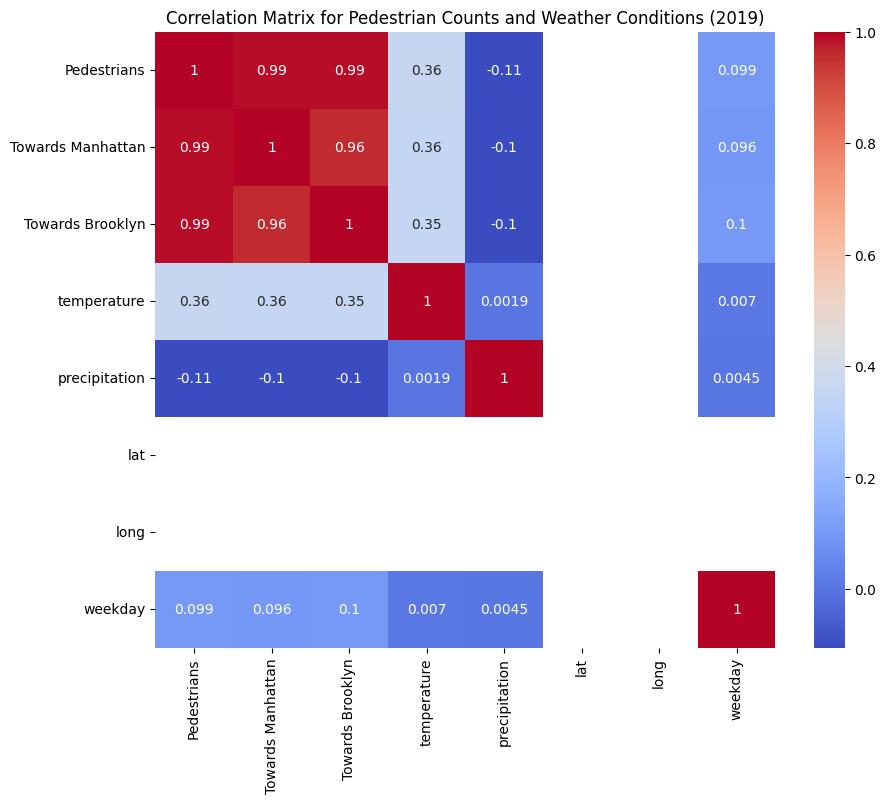

In [51]:
# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Pedestrian Counts and Weather Conditions (2019)')
plt.show()

## Question 3

In [54]:
# Categorizing time of day based on hour
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [55]:
# Converting 'hour_beginning' to datetime format
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

In [56]:
# Extracting the hour from the 'hour_beginning' column
df['hour'] = df['hour_beginning'].dt.hour


In [57]:
# Categorize the time of day
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)
df[['hour_beginning', 'hour', 'time_of_day']].head()

,hour_beginning,hour,time_of_day
0,2019-04-30 00:00:00,0,Night
1,2019-12-31 22:00:00,22,Night
2,2019-12-31 23:00:00,23,Night
3,2019-12-31 21:00:00,21,Night
4,2019-04-01 03:00:00,3,Night


In [60]:
# Grouping by 'time_of_day' and calculate the total pedestrian counts for each category
pedestrian_activity_by_time = df.groupby('time_of_day')['Pedestrians'].sum().reset_index()

# Sorting the data by time of day
time_of_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
pedestrian_activity_by_time['time_of_day'] = pd.Categorical(pedestrian_activity_by_time['time_of_day'], categories=time_of_day_order, ordered=True)
pedestrian_activity_by_time = pedestrian_activity_by_time.sort_values('time_of_day')

print(pedestrian_activity_by_time)


  time_of_day  Pedestrians
2     Morning      2480582
0   Afternoon      5852025
1     Evening      2432145
3       Night       268114


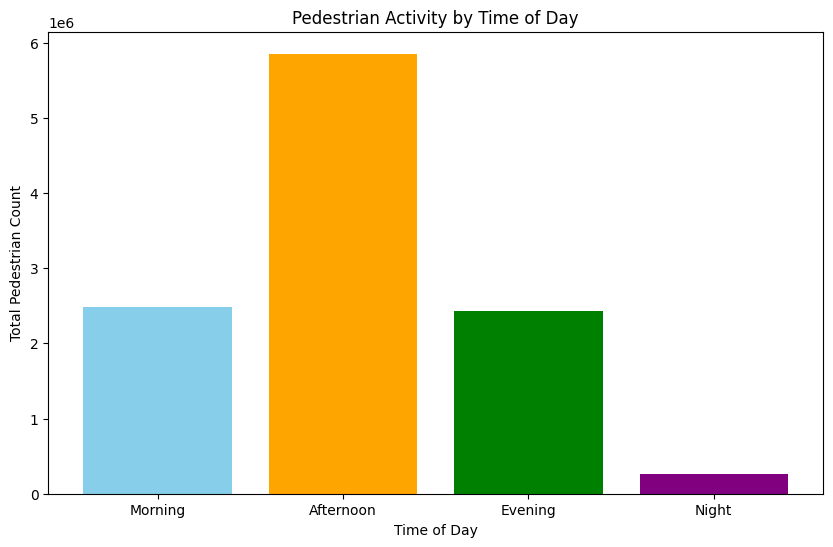

In [59]:
# Plotting pedestrian activity by time of day
plt.figure(figsize=(10, 6))
plt.bar(pedestrian_activity_by_time['time_of_day'], pedestrian_activity_by_time['Pedestrians'], color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.show()


In [61]:
# Analyzing activity on weekdays vs weekends
df['weekday'] = df['hour_beginning'].dt.weekday
df['is_weekend'] = df['weekday'] >= 5

# Grouping by 'time_of_day' and 'is_weekend' to see pedestrian counts for weekdays vs weekends
activity_by_time_and_weekend = df.groupby(['time_of_day', 'is_weekend'])['Pedestrians'].sum().reset_index()



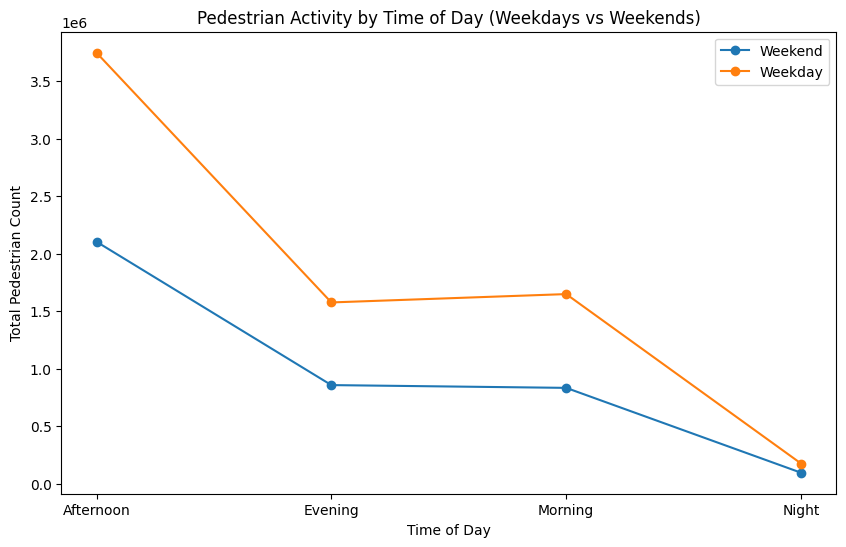

In [63]:
# Plotting pedestrian activity by time of day, separated by weekday and weekend
plt.figure(figsize=(10, 6))
for is_weekend in [True, False]:
    subset = activity_by_time_and_weekend[activity_by_time_and_weekend['is_weekend'] == is_weekend]
    label = 'Weekend' if is_weekend else 'Weekday'
    plt.plot(subset['time_of_day'], subset['Pedestrians'], marker='o', label=label)

plt.title('Pedestrian Activity by Time of Day (Weekdays vs Weekends)')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.legend()
plt.show()